## Final Project 
## Convolutional Neural Network 
## Animal Classification
### Emanuel Ruiz
### 


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:

! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#download kaggle json file from own profile
#upload kaggle json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"emanuelruiz","key":"af721580c3ddfe1844e6428b92108bfd"}'}

In [ ]:
# make kaggle directory
! mkdir ~/.kaggle

In [ ]:
# copy kaggle json file to .kaggle directory
! cp kaggle.json ~/.kaggle/

In [ ]:
# change the permissions for the kaggle json file
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d alessiocorrado99/animals10

 98% 576M/586M [00:04<00:00, 137MB/s]
100% 586M/586M [00:04<00:00, 129MB/s]


In [ ]:
! unzip animals10.zip

In [ ]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from keras import layers
from keras import Sequential
from keras import utils
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_direct = "/content/raw-img"

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_direct)

Found 26179 files belonging to 10 classes.


In [ ]:
data.class_names

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [ ]:
data_augmentation = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical',input_shape=(256,256,3)),
                                         tf.keras.layers.experimental.preprocessing.RandomRotation(0.1)])

In [ ]:
train_size = int(len(data)*.7)
valid_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_data = data.take(train_size)
valid_data = data.skip(train_size).take(valid_size)
test_data = data.skip(train_size+valid_size).take(test_size)

In [ ]:

cnn = tf.keras.models.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256,256,3)),
    data_augmentation,
    layers.Conv2D(16,3,1,padding='same',activation='relu',input_shape=(256,256,3) ),
    layers.Conv2D(16,3,1,padding='valid',activation='relu'),
    layers.MaxPool2D(pool_size=(2,2),strides=2),
    layers.BatchNormalization(),
    layers.Conv2D(32,3,1,padding='same',activation='relu'),
    layers.Conv2D(32,3,1, padding='valid', activation='relu' ),
    layers.MaxPool2D(pool_size=(2,2),strides=2),
    layers.BatchNormalization(),
    layers.Conv2D(64,3,1,padding='same',activation='relu'),
    layers.Conv2D(64,3,1, padding='valid',activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    layers.BatchNormalization(),
    layers.Conv2D(128,3,1,padding='same',activation='relu'),
    layers.Conv2D(128,3,1,padding='valid',activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=2),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(units=256,activation='relu'),
    layers.Dropout(.5),
    layers.Dense(units=10,activation='softmax'),
])


In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 16)     64        
 ormalization)                                        

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

In [ ]:
history = cnn.fit(train_data,validation_data=valid_data,epochs=70)

Epoch 1/70
573/573 [==============================] - 4037s 7s/step - loss: 2.5973 - accuracy: 0.2799 - val_loss: 2.2484 - val_accuracy: 0.2535
Epoch 2/70
573/573 [==============================] - 4144s 7s/step - loss: 1.7879 - accuracy: 0.3865 - val_loss: 2.0377 - val_accuracy: 0.3514
Epoch 3/70
399/573 [===================>..........] - ETA: 18:56 - loss: 1.6540 - accuracy: 0.4319

# Invaluation

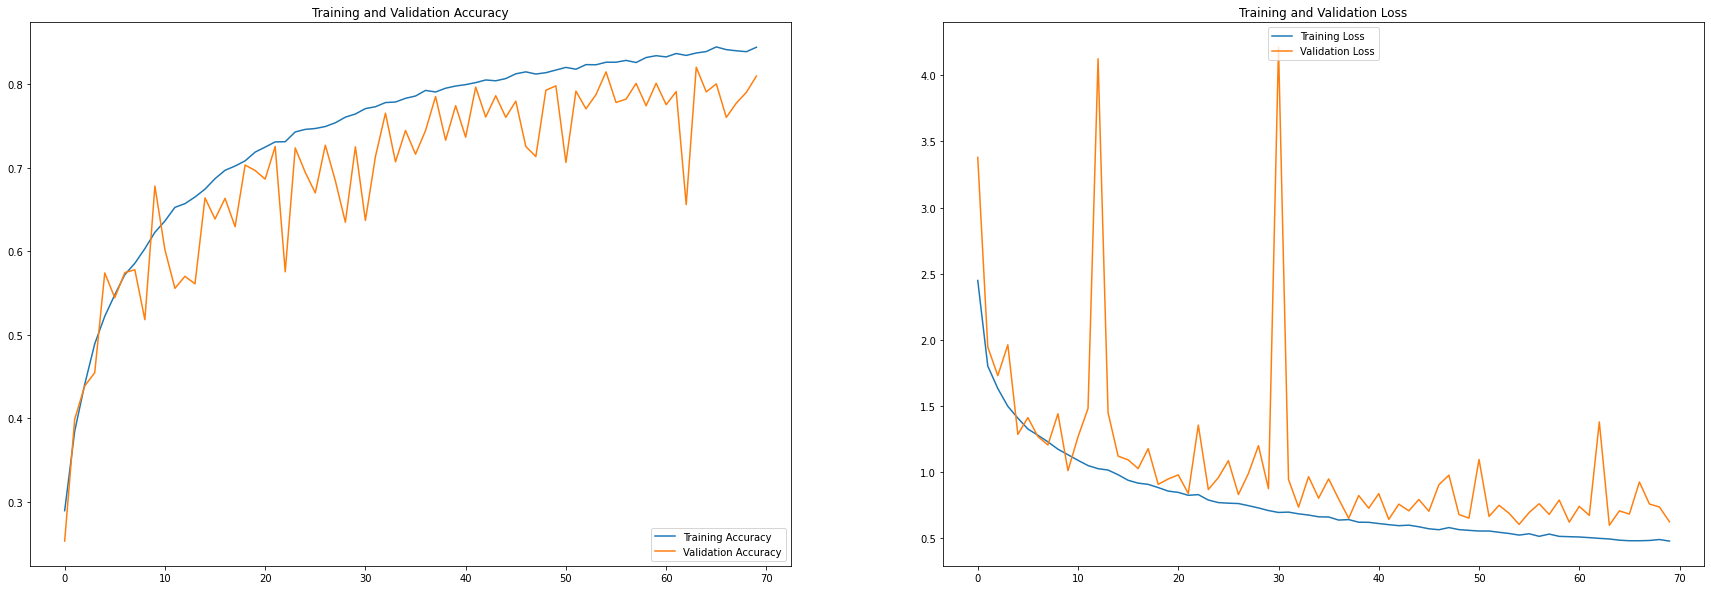

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(70)

plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, acc, label='Training Accuracy')
plt.plot(epoch_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch_range, loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.legend(loc='upper center')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate Using Test Data

In [ ]:
results = cnn.evaluate(test_data, batch_size=32)
print("test loss, test acc:", results)


81/81 [==============================] - 85s 888ms/step - loss: 0.6036 - accuracy: 0.8175
test loss, test acc: [0.6036369204521179, 0.8175154328346252]
